In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#removing missing values 
cols=["total_bedrooms"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

In [8]:
df.shape

(20640, 10)

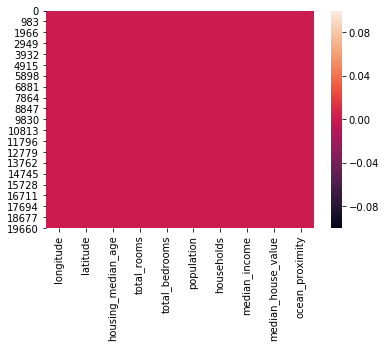

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

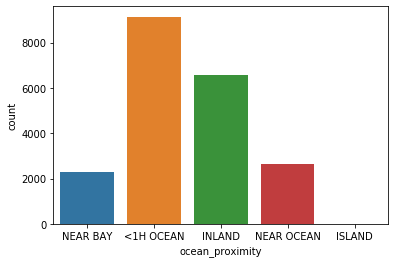

In [11]:
sns.countplot(df.ocean_proximity)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C43D7ABC8>,
      dtype=object)

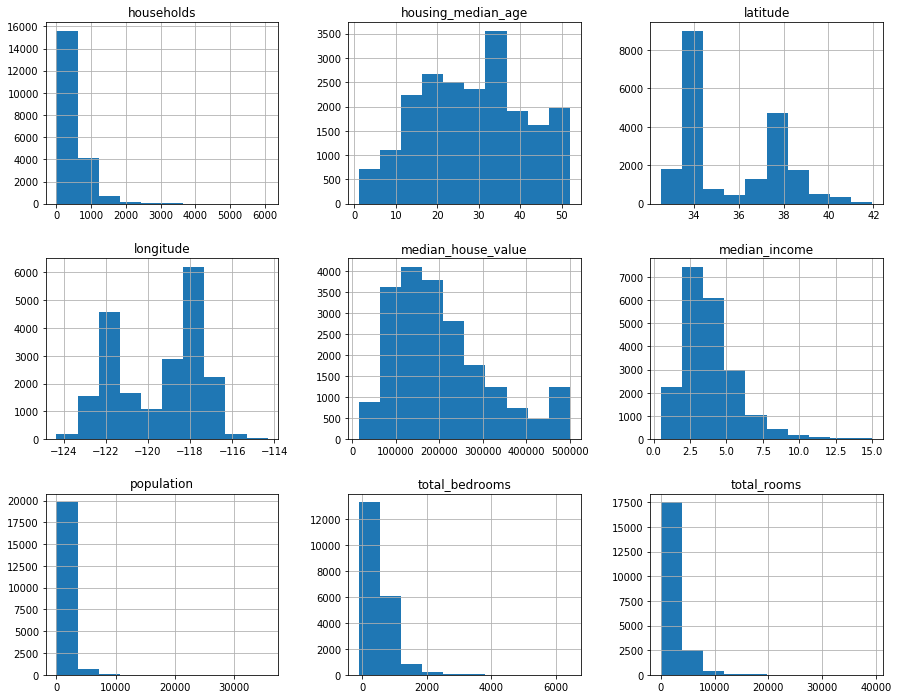

In [12]:
df.hist(figsize=(15,12))

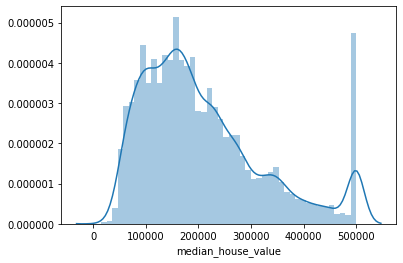

In [13]:
sns.distplot(df.median_house_value)
#median house value falls between 10,000 to 30,000

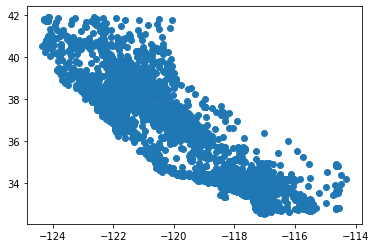

In [14]:
plt.scatter(df['longitude'],df['latitude'])


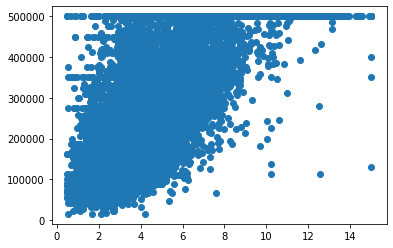

In [15]:
plt.scatter(df['median_income'],df['median_house_value'])

In [16]:
df_num=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].copy()

In [17]:
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


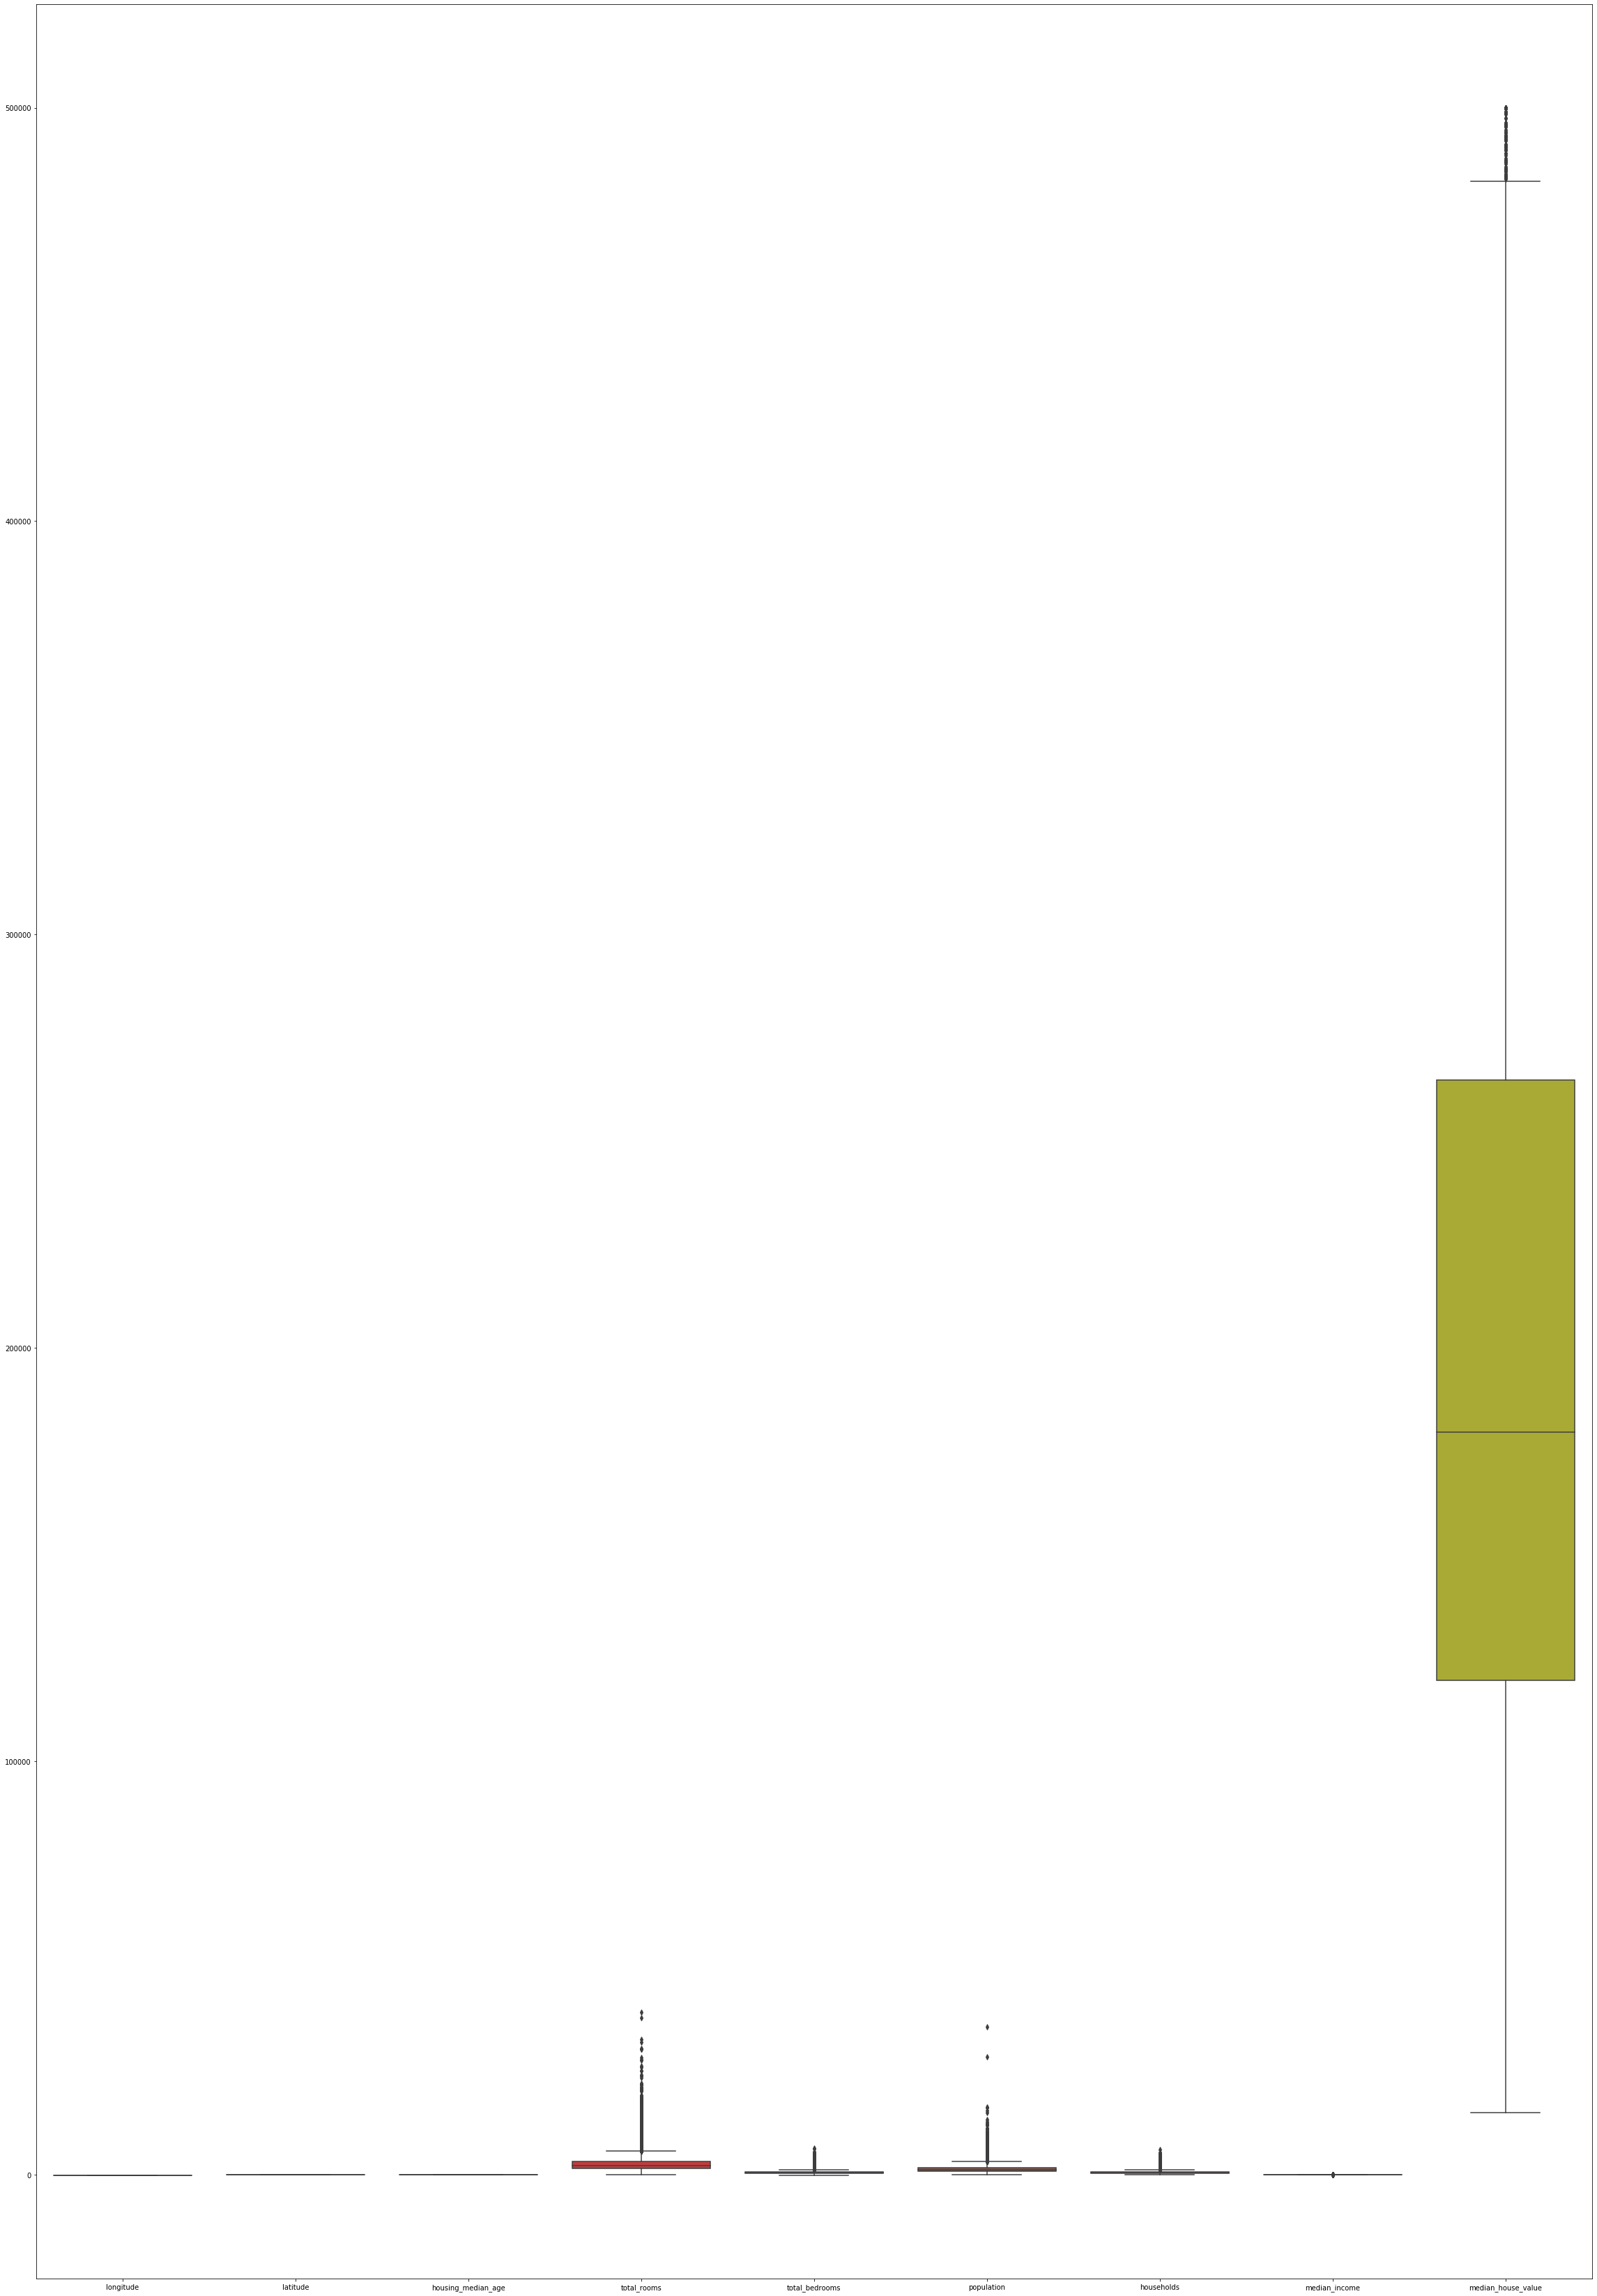

In [18]:
plt.figure(figsize = (40,60))
sns.boxplot(data=df_num)
#outliers present

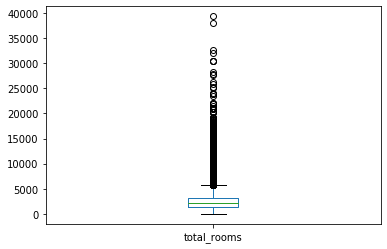

In [19]:
# working on outliers
df['total_rooms'].plot.box()

In [20]:
df.loc[df['total_rooms']>5000,'']=np.mean(df['total_rooms'])

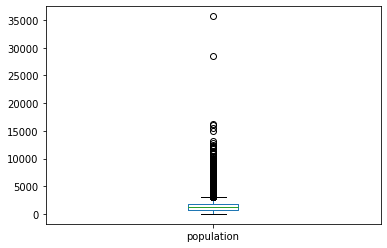

In [21]:
df['population'].plot.box()

In [22]:
df.loc[df['population']>5000,'']=np.mean(df['population'])

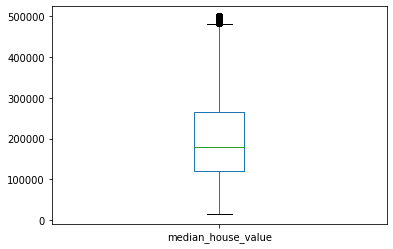

In [23]:
df['median_house_value'].plot.box()


In [24]:
df.loc[df['median_house_value']>50000,'']=np.mean(df['median_house_value'])

In [25]:
df_cat = df[['ocean_proximity']].copy()
df_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [26]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [27]:
df_final = pd.concat([df_num, df_cat], axis=1)
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [28]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20438.000000
mean,-119.569704,35.631861,28.639486,2635.763081,531.277038,1425.476744,499.539680,3.870671,206855.816909,206775.642646
std,2.003532,2.135952,12.585558,2181.615252,424.353686,1132.462122,382.329753,1.899822,115395.615874,4051.694429
min,-124.350000,32.540000,1.000000,2.000000,-119.569704,3.000000,1.000000,0.499900,14999.000000,1425.476744
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,206855.816909
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,206855.816909
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,206855.816909
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,206855.816909


In [29]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,
longitude,1.000000,-0.924664,-0.108197,0.044568,0.067676,0.099773,0.055310,-0.015176,-0.045967,-0.005344
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.064883,-0.108785,-0.071035,-0.079809,-0.144160,-0.008096
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.315953,-0.296244,-0.302916,-0.119034,0.105623,0.003743
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.916658,0.857126,0.918484,0.198050,0.134153,-0.054556
total_bedrooms,0.067676,-0.064883,-0.315953,0.916658,1.000000,0.862716,0.962614,-0.007194,0.048975,-0.056337
population,0.099773,-0.108785,-0.296244,0.857126,0.862716,1.000000,0.907222,0.004834,-0.024650,-0.076046
households,0.055310,-0.071035,-0.302916,0.918484,0.962614,0.907222,1.000000,0.013033,0.065843,-0.052212
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007194,0.004834,0.013033,1.000000,0.688075,0.015319
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.048975,-0.024650,0.065843,0.688075,1.000000,0.029350
,-0.005344,-0.008096,0.003743,-0.054556,-0.056337,-0.076046,-0.052212,0.015319,0.029350,1.000000


In [30]:
corr_hmap=df.corr()

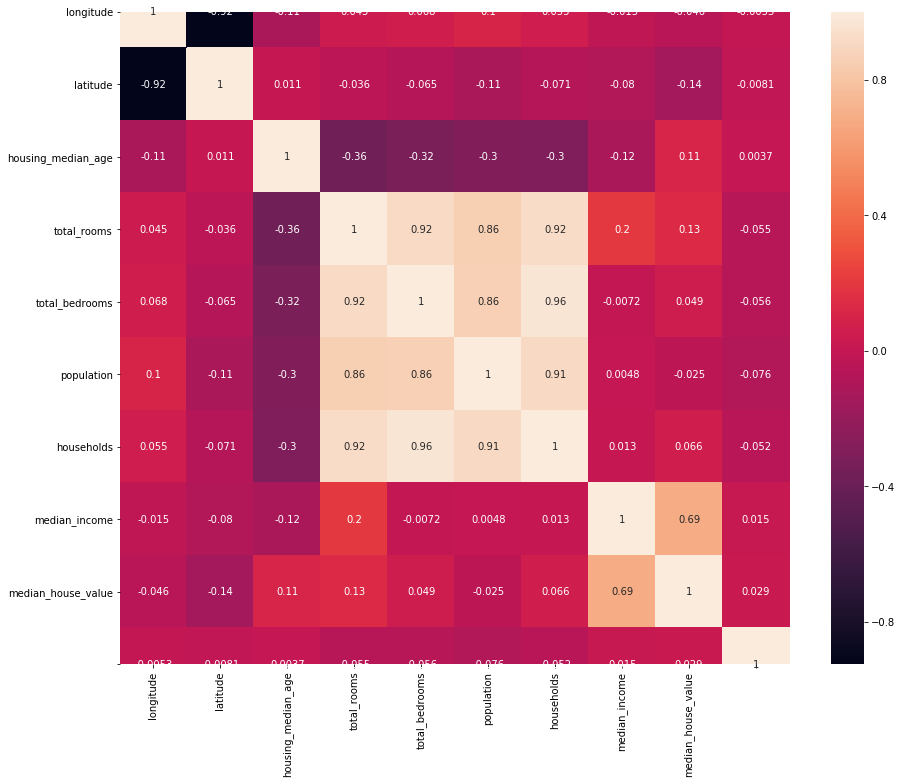

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_hmap, annot=True)

In [32]:
df.corr().median_house_value.sort_values(ascending=False) 
#so lets see which our the most correlated columns with respect to mediian house value so that is median income and then total_rooms and so on

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.048975
                      0.029350
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [33]:
x = df_final.drop('median_house_value', axis = 1)
y= df_final['median_house_value']

In [34]:
x.shape

(20640, 13)

In [35]:
y.shape

(20640,)

In [36]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=13)
x = pca_new.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=42)

In [38]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.6447667999054922

In [39]:
x_train.shape

(20607, 13)

In [40]:
y_train.shape

(20607,)

In [41]:
y_test.shape

(33,)

In [42]:
x_test.shape

(33, 13)

In [43]:
lm=LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lm.coef_

array([ 4.82264658e+00, -6.16550113e+01,  2.95128415e+01,  2.24342559e+02,
        1.64275625e+03, -5.74386236e+03, -4.67938303e+04,  4.03045672e+04,
        1.34881890e+04,  2.52850216e+03,  3.56965670e+03,  1.49947367e+05,
       -1.52875474e-11])

In [46]:
lm.score(x_train,y_train)

0.6447670508598634

In [47]:
pred=lm.predict(x_test)
print("Predicted median house value:",pred)
print("actual median house value",y_test)

Predicted median house value: [ 25308.81149091 107495.18894815 258620.96753723 244807.6527513
 237296.80064366 136885.25556413 252086.91042428 192621.9481074
 239190.5224026  373091.3110422   74591.00969896 160671.18108815
  54372.90216321 139446.556283   230489.05248848  67712.27020231
 227911.22263998 160577.97131558 211204.92780558  78230.205161
 274669.32223886 250361.10266038 139026.73752339 304198.93906881
 182733.00021837  40772.55658737 131053.51957223 184825.55425982
 138914.70620278 306626.64621088 132098.47221172 117741.47448772
 177912.30304675]
actual median house value 20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
13311    158700
7113     198200
7668     157500
18246    340000
5723     446600
20069    123200
6835     253900
11351    215100
20267    220500
7097     219800
6298     136200
696      178400
19607    187500
14173    139800
19638    137500
18332    425000
4691     405600
2323     138800
16880    500001
14521    162100
19833     

In [48]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 67232.75572131058
Mean squared error: 67232.75572131058
Root Mean Squared error: 87171.6956102836


In [49]:
#lets use other models to predict our results
#k fold cross validation k=10
scores = cross_val_score(lm, x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [50]:
rmse_scores = np.sqrt(-scores)

In [51]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  72346.66302757766 
Standard Deviation: 13905.75307205543


In [52]:
#it has performed not better then the lm lets try other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [53]:
tree_reg_scores = np.sqrt(-scores)

In [54]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  72346.66302757766 
Standard Deviation: 13251.905887804454


In [55]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  72346.66302757766 
Standard Deviation: 13251.905887804454


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [58]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [59]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  64756.597727314234 
Standard Deviation: 11228.421491233503


In [60]:
#rmse works best till now

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [62]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [63]:
grid_search.best_estimator_
#it says max features is 8 and n_etimators is 30

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None, n_estimators=30)
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
r2_score(tree_reg.predict(x_train),y_train)

1.0

In [67]:
#model overfitting lets cross validate it
cross_val_score(tree_reg, x_train, y_train, cv=10)

array([0.51925696, 0.56551969, 0.56798523, 0.60477938, 0.55104778,
       0.58666031, 0.60377988, 0.63038765, 0.59718455, 0.59599215])

In [68]:
kfold = model_selection.KFold(n_splits=3, random_state=100)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 62.80%


In [69]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = RandomForestRegressor()
results_skfold = model_selection.cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 62.80%


In [70]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.6447667999054922


In [71]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [77]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 4.83774682e+00 -6.16081984e+01  3.07431259e+01  2.31617582e+02
  1.64447137e+03 -5.74325683e+03 -4.67177292e+04  4.02932342e+04
  1.35356013e+04  2.46341365e+03  3.68823641e+03  1.29615735e+05
  9.19261566e-10]
0.537766173015333


In [73]:
r2_score(forest_reg.predict(x_test),y_test)

0.9143362434144707

In [78]:
forest_reg_cv_score = cross_val_score(forest_reg, x, y,cv=3)

In [79]:
forest_reg_cv_score

array([0.63476215, 0.7251947 , 0.61803406])

In [ ]:
#lets save  random forest regression model with 91 accuracy

In [80]:
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_regcalifornia.obj')
forest_reg_from_joblib=joblib.load('forest_regcalifornia.obj')